In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV

In [ ]:
df = pd.read_csv("stock_data.csv", header=None)

# Hiển thị vài dòng đầu tiên của dữ liệu
print("Dữ liệu gốc:")
print(df.head())

Dữ liệu gốc:
         0     1      2     3     4          5      6       7      8       9   \
0  ACB9.99% -0.37  26.10  27.9  24.3   5,469,90  25.90  385,10  25.95  154,30   
1       BID   NaN  40.95  43.8  38.1   3,051,60  40.80  123,80  40.85    2,60   
2  CTG9.99%   NaN  41.50  44.4  38.6   5,529,30  41.40   16,20  41.45    8,20   
3  GAS5.99%   NaN  68.00  72.7  63.3     787,60  67.80   14,10  67.90   26,00   
4       HDB -0.36  23.20  24.8  21.6  10,152,10  22.95  147,40  23.00  107,40   

   ...     17     18      19     20      21     22     23    24        25  \
0  ...  12,90  26.10  242,90  26.15  254,90  26.20  25.97  25.8  3,910,77   
1  ...  11,10  41.00   63,10  41.05    8,20  40.95  40.82  40.7     88,30   
2  ...  72,90  41.60  108,90  41.65   26,90  41.60  41.26  41.0  1,082,70   
3  ...  21,10  68.20   22,70  68.30   15,50  68.70  68.26  68.0    171,02   
4  ...  49,90  23.15  119,70  23.20  505,60  23.20  22.96  22.8  1,042,90   

         26  
0  3,910,80  
1    462,

# Xử lý dữ liệu: đặt tên cột (giả định số cột dựa trên dữ liệu mẫu)

In [5]:
df.columns = ["Mã CK", "Thay đổi %",  "Giá hiện tại", "Cao nhất", "Thấp nhất", 
              "KL giao dịch", "Giá mở cửa", "KL mở cửa", "Giá bán 1", "KL bán 1", 
              "Giá bán 2", "KL bán 2", "Giá bán 3", "KL bán 3", "Thay đổi giá", "Thay đổi % (2)",
              "Giá mua 1", "KL mua 1", "Giá mua 2", "KL mua 2", "Giá mua 3", "KL mua 3",
              "Giá tham chiếu", "Giá trung bình", "Giá sàn", "GTGD khớp lệnh", "GTGD thỏa thuận"]

# Xử lý các cột số: loại bỏ dấu phẩy và chuyển thành float

In [6]:
cols_to_clean = ["Giá hiện tại", "Cao nhất", "Thấp nhất", "Giá mở cửa", "Giá bán 1", "Giá mua 1"]
for col in cols_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

In [7]:
print("\nThống kê mô tả:")
print(df.describe())


Thống kê mô tả:
       Thay đổi %  Giá hiện tại    Cao nhất  Thấp nhất  Giá mở cửa  Giá bán 1  \
count   11.000000     15.000000   15.000000  15.000000   15.000000  15.000000   
mean    -0.341818     42.740000   45.696667  39.783333   42.445333  42.506000   
std      0.498795     27.007421   28.873953  25.140901   26.710833  26.734955   
min     -1.580000     10.050000   10.750000   9.350000    9.980000   9.990000   
25%     -0.455000     24.650000   26.350000  22.950000   24.425000  24.475000   
50%     -0.360000     36.750000   39.300000  34.200000   36.050000  36.100000   
75%     -0.040000     55.475000   59.325000  51.625000   55.450000  55.525000   
max      0.250000     96.900000  103.600000  90.200000   95.800000  95.900000   

       Giá bán 2  Giá bán 3  Thay đổi giá  Giá mua 1  Giá mua 2  Giá mua 3  \
count  15.000000  15.000000     11.000000  15.000000  15.000000  15.000000   
mean   42.566667  42.576667     -0.222727  42.650000  42.716667  42.780000   
std    26.759082  2

# Vẽ biểu đồ phân phối giá hiện tại của các cổ phiếu

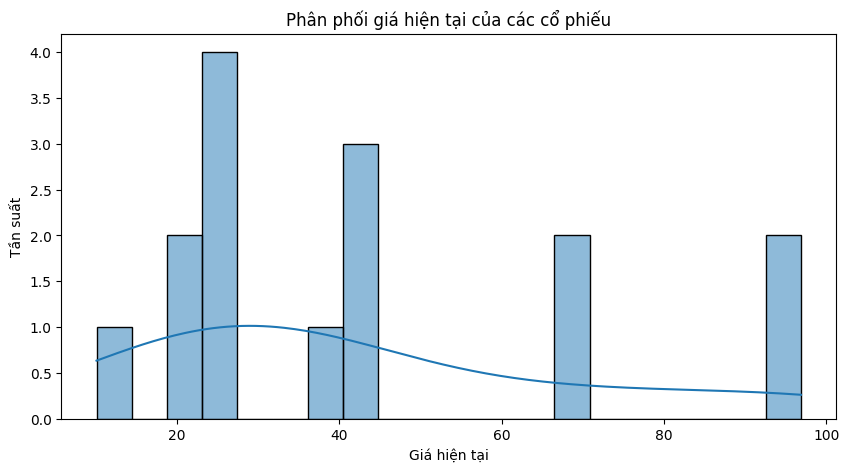

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Giá hiện tại"].dropna(), bins=20, kde=True)
plt.title("Phân phối giá hiện tại của các cổ phiếu")
plt.xlabel("Giá hiện tại")
plt.ylabel("Tần suất")
plt.show()

# Vẽ biểu đồ so sánh giá cao nhất và thấp nhất

<Figure size 1200x600 with 0 Axes>

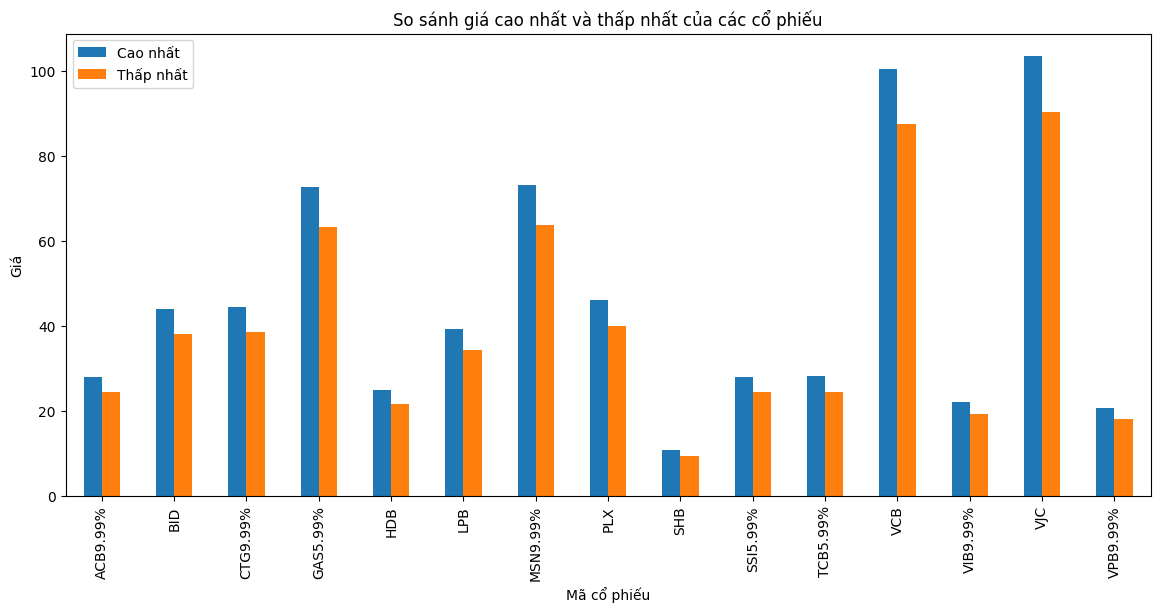

In [9]:
plt.figure(figsize=(12, 6))
df.plot(x="Mã CK", y=["Cao nhất", "Thấp nhất"], kind="bar", figsize=(14, 6))
plt.title("So sánh giá cao nhất và thấp nhất của các cổ phiếu")
plt.xlabel("Mã cổ phiếu")
plt.ylabel("Giá")
plt.xticks(rotation=90)
plt.show()